<a href="https://colab.research.google.com/github/frecklehead/MyProjects/blob/main/cnn_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

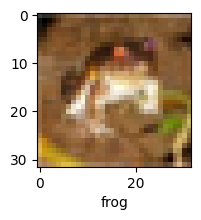

In [10]:
plot_sample(X_train, y_train, 0)

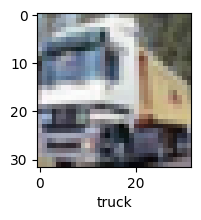

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 146s 93ms/step - loss: 1.8143 - accuracy: 0.3523
Epoch 2/5
1272/1563 [=======================>......] - ETA: 27s - loss: 1.6311 - accuracy: 0.4237

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-84b96cea7a74>", line 12, in <cell line: 12>
    ann.fit(X_train, y_train, epochs=5)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 832, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorph

TypeError: object of type 'NoneType' has no len()

**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 29ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.50      0.52      1000
           1       0.39      0.76      0.52      1000
           2       0.32      0.36      0.34      1000
           3       0.28      0.52      0.36      1000
           4       0.56      0.15      0.24      1000
           5       0.35      0.37      0.36      1000
           6       0.54      0.36      0.43      1000
           7       0.55      0.45      0.49      1000
           8       0.62      0.50      0.55      1000
           9       0.60      0.33      0.42      1000

    accuracy                           0.43     10000
   macro avg       0.47      0.43      0.42     10000
weighted avg       0.47      0.43      0.42     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4430 - accuracy: 0.4813
Epoch 2/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.0903 - accuracy: 0.6176
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9677 - accuracy: 0.6624
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8883 - accuracy: 0.6914
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8278 - accuracy: 0.7121
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7732 - accuracy: 0.7333
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7293 - accuracy: 0.7471
Epoch 8/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6862 - accuracy: 0.7627
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6422 - accuracy: 0.7771
Epoch 10/10
1563/1563 [==============================] - 61s 39m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9787 - accuracy: 0.6825


[0.9787072539329529, 0.6825000047683716]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 19ms/step


array([[5.88170733e-05, 2.81787720e-06, 2.03955697e-05, 9.46684301e-01,
        3.30953044e-05, 5.17817400e-02, 9.70493827e-04, 2.11908014e-06,
        4.30319604e-04, 1.58553612e-05],
       [2.56662429e-06, 1.17452219e-05, 1.55116339e-07, 1.17428078e-06,
        6.51603715e-10, 2.40131826e-09, 8.85545319e-07, 9.68393143e-11,
        9.99973357e-01, 1.00585585e-05],
       [4.38049324e-02, 2.33607858e-01, 9.16188932e-04, 3.12421750e-03,
        8.01657909e-04, 7.92091305e-05, 1.28070917e-03, 2.87074334e-04,
        7.11469889e-01, 4.62832907e-03],
       [6.43319964e-01, 2.33966764e-03, 8.69272873e-02, 1.24890907e-02,
        3.94624211e-02, 1.59971660e-03, 3.88765186e-02, 1.16781343e-03,
        1.72768414e-01, 1.04907283e-03],
       [1.65114699e-07, 1.74134129e-07, 1.01173101e-02, 2.55649118e-03,
        1.64866060e-01, 3.01042572e-04, 8.22154343e-01, 1.36241397e-07,
        4.23992651e-06, 2.45215337e-09]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

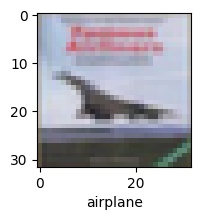

In [21]:
plot_sample(X_test, y_test,3)

In [22]:
classes[y_classes[3]]

'airplane'

In [23]:
classes[y_classes[3]]

'airplane'